In [1]:
from joblib import dump, load
from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from preprocessor import preprocessor


plt.style.use("ggplot")

# Load training data
dataset = pd.read_csv("./train.csv")
print(dataset.head())


                  Date  Latitude_degree  Longitude_degree Beaufort  \
0  2016-06-03 01:00:00        35.175000        141.595556   medium   
1  2016-06-03 02:00:00        35.315833        141.884444   medium   
2  2016-06-03 03:00:00        35.458333        142.121111   medium   
3  2016-06-03 04:00:00        35.573611        142.548611   medium   
4  2016-06-03 05:00:00        35.939722        142.768889   medium   

   Speed(Ground)  M/E REVOLUTION    FOC  
0           17.5              86    NaN  
1           18.3              86  169.0  
2           18.4              86  165.0  
3           18.1              86  163.0  
4           18.8              86  163.0  


In [2]:
# Describe dataset
dataset.describe()


,Latitude_degree,Longitude_degree,Speed(Ground),M/E REVOLUTION,FOC
count,20000.000000,20000.000000,20000.000000,20000.000000,19999.000000
mean,33.016999,-29.669950,14.024100,69.619350,131.696835
std,12.263632,129.761046,5.924093,29.264823,598.328438
min,6.571944,-180.195278,0.000000,0.000000,0.000000
25%,25.369792,-130.251736,13.400000,67.000000,87.500000
50%,34.795000,-80.924306,16.500000,83.000000,148.000000
75%,41.496181,138.181319,17.600000,87.000000,172.000000
max,54.626944,180.217500,22.100000,95.000000,77429.000000


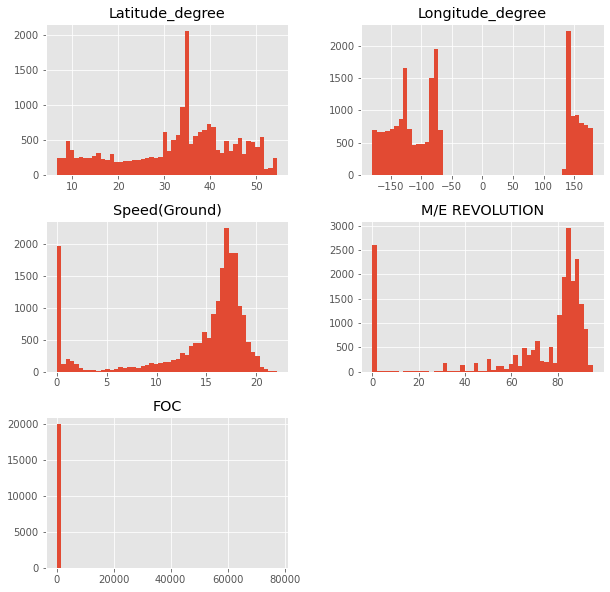

In [3]:
# Visualize dataset

%matplotlib inline

dataset.hist(bins = 50, figsize=(10, 10))

plt.show()

<AxesSubplot:title={'center':'Beaufort'}>

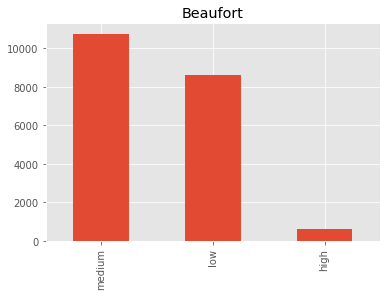

In [4]:
dataset["Beaufort"].value_counts().plot(kind="bar", title="Beaufort")


In [5]:
dataset.corr()

,Latitude_degree,Longitude_degree,Speed(Ground),M/E REVOLUTION,FOC
Latitude_degree,1.000000,0.144748,-0.052138,-0.029344,0.001699
Longitude_degree,0.144748,1.000000,-0.146297,-0.128991,0.001488
Speed(Ground),-0.052138,-0.146297,1.000000,0.982161,0.082622
M/E REVOLUTION,-0.029344,-0.128991,0.982161,1.000000,0.083874
FOC,0.001699,0.001488,0.082622,0.083874,1.000000


In [6]:
# Split X and y variables, remove empty FOC values
dataset = dataset.dropna(subset=["FOC"])

feature_cols = [
    "Latitude_degree",
    "Longitude_degree",
    "Beaufort",
    "Speed(Ground)",
    "M/E REVOLUTION",
    "Date",
]

X = dataset.loc[:, feature_cols]
y = dataset.FOC

print(X.shape)
print(y.shape)


(19999, 6)
(19999,)


In [7]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

print(X_train.shape, X_test.shape)


(15999, 6) (4000, 6)


In [8]:
# X_train["date_parsed"] = pd.to_datetime(X_train["Date"])

# X_train["year"] = X_train["date_parsed"].apply(lambda date: date.year)
# X_train["month"] = X_train["date_parsed"].apply(lambda date: date.month)
# X_train["day"] = X_train["date_parsed"].apply(lambda date: date.day)
# X_train["hour"] = X_train["date_parsed"].apply(lambda date: date.hour)
# print(X_train.head())


In [9]:
X_train = preprocessor.fit_transform(X_train)
dump(preprocessor, 'preprocessor.joblib')

pipe = Pipeline(
    [
        ("forest", LinearSVR(max_iter=10000)),
    ]
)

# param_grid = {
#     "forest__n_estimators": [10, 20, 50, 100],
#     "forest__max_depth": [5, 10, 20, 50, None],
# }
# param_grid = {"forest__max_depth": [10, 20, 100]}
param_grid = {}


search = GridSearchCV(pipe, param_grid, n_jobs=8)
search.fit(X_train, y_train)

print(f"Best score: {search.best_score_}")
print(f"Best params: {search.best_params_}")

model = search.best_estimator_

# model = pipe
# model.fit(X_train, y_train)


/Users/daniel/Documents/t/activate/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/daniel/Documents/t/activate/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/daniel/Documents/t/activate/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/daniel/Documents/t/activate/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/daniel/Documents/t/activate/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best score: 0.17107244023505846
Best params: {}


/Users/daniel/Documents/t/activate/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [10]:
X_test = preprocessor.transform(X_test)

predictions = model.predict(X_test)
mse = mean_squared_error(predictions, y_test)

print(mse)
# [print(f"{y1} {y2}") for (y1, y2) in zip(predictions, y_test)]


15489.638422930919


In [11]:
model.score(X_test, y_test)


0.15067252278976995

In [12]:
dump(model, './predictor.joblib')

['./predictor.joblib']